In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
import joblib
import pickle


import mordred
from mordred import Calculator, descriptors

# import pubchempy as pcp

import rdkit
# from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, rdMolDescriptors, rdDepictor
# from rdkit.Chem.Draw import IPythonConsole


# import rdkit, rdkit.Chem, rdkit.Chem.Draw
# from rdkit.Chem.Draw import IPythonConsole
# from rdkit.Chem import Draw
# from rdkit.Chem.Draw import rdMolDraw2D


# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import io
# import PIL.Image
# from PIL import ImageDraw, ImageFont



# import mordred, mordred.descriptors
# from mordred import HydrogenBond, Polarizability
# from mordred import SLogP, AcidBase, BertzCT, Aromatic, BondCount, AtomCount
# from mordred import Calculator

import exmol as exmol
# from rdkit.Chem.Draw import rdDepictor
# import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score, plot_roc_curve
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.linear_model import Ridge

from spectrum_func import *

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# rdDepictor.SetPreferCoordGen(True)

# IPythonConsole.ipython_useSVG = True
# color_cycle = ["#F06060", "#1BBC9B", "#F3B562", "#6e5687", "#5C4B51"]
# mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=color_cycle)
# np.random.seed(0)


In [2]:
optdata = pd.read_csv("data/DB_for_chromophore_Sci_Data_rev02.csv")
optdata.columns = ['Tag', 'Chromophore', 'Solvent', 'LambdaMaxAbs', 'LambdaMaxEm', 'Lifetime', 'QY', 'LogExtCoeff', 'AbsFWHMcm-1', 'EmFWHMcm-1', 'AbsFWHMnm', 'EmFWHMnm', 'MolarMass', 'reference']
features_start_at = list(optdata.columns).index("LambdaMaxAbs")
# scramble them
optdata = optdata.sample(frac=1.0, random_state=0).reset_index(drop=True)
optdata.head()

,Tag,Chromophore,Solvent,LambdaMaxAbs,LambdaMaxEm,Lifetime,QY,LogExtCoeff,AbsFWHMcm-1,EmFWHMcm-1,AbsFWHMnm,EmFWHMnm,MolarMass,reference
0,16295,[O-]c1c(-c2ccccc2)cc(-[n+]2c(-c3ccccc3)cc(-c3c...,Cc1ccncc1,723.822785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.68726,https://doi.org/10.1021/cr00032a005
1,5187,CN(C)c1ccc(C2=Cc3c4ccccc4cc[n+]3[B-](F)(F)O2)cc1,CC#N,458.000000,552.0,NaN,0.6380,4.522444,3326.0,2672.5,NaN,NaN,338.16398,https://doi.org/10.1016/j.saa.2018.03.048
2,8308,COc1cccc2cc(-c3cc4cccc(OC)c4oc3=O)oc12,CS(C)=O,359.000000,488.0,NaN,0.1100,4.457882,NaN,NaN,NaN,NaN,322.31516,DOI: 10.1021/acs.orglett.7b00069
3,11000,Cc1cc(-c2ccc(C(C)(C)C)cc2)cc(C)[o+]1,ClCCl,365.000000,417.0,2.1,0.2500,4.531479,3617.0,NaN,NaN,NaN,241.35274,https://doi.org/10.1016/S0009-2614(97)00140-1
4,13139,C(=C/c1cnc2ccccc2n1)\c1cnccn1,ClCCl,NaN,430.0,NaN,0.0014,NaN,NaN,NaN,NaN,NaN,234.26140,https://doi.org/10.1016/1010-6030(92)85164-P


In [3]:
working_df = optdata.copy()
working_df.head()


,Tag,Chromophore,Solvent,LambdaMaxAbs,LambdaMaxEm,Lifetime,QY,LogExtCoeff,AbsFWHMcm-1,EmFWHMcm-1,AbsFWHMnm,EmFWHMnm,MolarMass,reference
0,16295,[O-]c1c(-c2ccccc2)cc(-[n+]2c(-c3ccccc3)cc(-c3c...,Cc1ccncc1,723.822785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.68726,https://doi.org/10.1021/cr00032a005
1,5187,CN(C)c1ccc(C2=Cc3c4ccccc4cc[n+]3[B-](F)(F)O2)cc1,CC#N,458.000000,552.0,NaN,0.6380,4.522444,3326.0,2672.5,NaN,NaN,338.16398,https://doi.org/10.1016/j.saa.2018.03.048
2,8308,COc1cccc2cc(-c3cc4cccc(OC)c4oc3=O)oc12,CS(C)=O,359.000000,488.0,NaN,0.1100,4.457882,NaN,NaN,NaN,NaN,322.31516,DOI: 10.1021/acs.orglett.7b00069
3,11000,Cc1cc(-c2ccc(C(C)(C)C)cc2)cc(C)[o+]1,ClCCl,365.000000,417.0,2.1,0.2500,4.531479,3617.0,NaN,NaN,NaN,241.35274,https://doi.org/10.1016/S0009-2614(97)00140-1
4,13139,C(=C/c1cnc2ccccc2n1)\c1cnccn1,ClCCl,NaN,430.0,NaN,0.0014,NaN,NaN,NaN,NaN,NaN,234.26140,https://doi.org/10.1016/1010-6030(92)85164-P


## Filter out NaNs for LogExtCeoff and LambdaMaxAbs

In [4]:
optdata_LambdaMaxAbs = working_df[(~working_df["LambdaMaxAbs"].isna())]
optdata_LogExtCoeff = working_df[(~working_df["LogExtCoeff"].isna())]
working_df_LogExtCoeff = optdata_LogExtCoeff.copy()
working_df_LambdaMaxAbs = optdata_LambdaMaxAbs.copy()

## Obtain features for RF model using mordred, and assign LogExtCoeff values as associated y "Values".

In [5]:
optdata_LogExtCoeff.index

Int64Index([    1,     2,     3,     6,    10,    11,    13,    17,    18,
               19,
            ...
            20219, 20221, 20223, 20224, 20228, 20229, 20230, 20232, 20233,
            20234],
           dtype='int64', length=8041)

In [6]:
# Define a list of descriptor groups to exclude
exclude_groups = ['MoreauBrotoAutocorrelation', 'GearyAuto', 'MoranAuto', 'BaryszMatrix']

# Remove the undesired descriptor groups from the list of descriptors
descriptors_to_use = []
for desc in descriptors.__all__:
    if desc not in exclude_groups:
        descriptors_to_use.append(getattr(descriptors, desc))

# Make object that can compute descriptors
calc = Calculator(descriptors_to_use, ignore_3D=True)


In [7]:

def get_mol_and_labels(calculators, df, property, filepath):
    # Load molecules from valid SMILES strings
    molecules = []
    labels = []
    for i, smi in zip(df.index, df.Chromophore):
        mol = rdkit.Chem.MolFromSmiles(smi)
        if mol:
            molecules.append(mol)
            labels.append(df.loc[i][property])

    # calculating mordred features is time consuming so we work with precalculated features
    try:
        raw_features = pd.read_pickle(filepath)
    except FileNotFoundError as e:
        raw_features = calculators.pandas(molecules, nproc=8, quiet=False)
        raw_features.to_pickle(filepath)
    
    return molecules, labels, raw_features

In [8]:

molecules_lec, labels_lec, raw_features_lec = get_mol_and_labels(calc, working_df_LogExtCoeff, "LogExtCoeff", "data/raw_features_lec.pb")
molecules_lma, labels_lma, raw_features_lma = get_mol_and_labels(calc, working_df_LambdaMaxAbs, "LambdaMaxAbs", "data/raw_features_lma.pb")

## Remove Features with NaNs, Test-Train-Split, Run RF model, define function that applies model to predict (LogExtCoeff) from mordred features of a future molecule of interest

In [9]:
def train_rf_clf(features, labels, calculators, filepath, max_depth=20, test_size=0.2, random_state=0):
    # Cast features to float
    feature_values = features.values.astype(float)

    # Remove columns with NaNs and get the names of the features
    selected_features = np.all(np.isfinite(feature_values), axis=0)
    mordred_names = np.array([str(i) for i in calculators.descriptors])
    feature_values = feature_values[:, selected_features]
    mordred_names = mordred_names[selected_features]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(feature_values, labels, test_size=test_size, shuffle=True, random_state=random_state)
    
    # Load prior model or create a new one
    try:
        clf = joblib.load(filepath)
    except FileNotFoundError as e:
        clf = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
        joblib.dump(clf, filepath)
    
    # Predict and score
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test)

    return clf, mordred_names, predicted, score, X_train, X_test, y_train, y_test

In [10]:
lec_rf, lec_mordred_names, lec_predicted, lec_score, lec_X_train, lec_X_test, lec_y_train, lec_y_test = train_rf_clf(raw_features_lec, labels_lec, calc, "RF_LEC_TF.joblib")
lma_rf, lma_mordred_names, lma_predicted, lma_score, lma_X_train, lma_X_test, lma_y_train, lma_y_test = train_rf_clf(raw_features_lma, labels_lma, calc, "RF_LMA_TF.joblib")

# Scores
print(f"LogExtCoeff score is: {lec_score}")
print(f"LambdaMaxAbs score is: {lma_score}")
print(len(lec_mordred_names))
print(len(lma_mordred_names))

LogExtCoeff score is: 0.800534014567128
LambdaMaxAbs score is: 0.9296261368595011
789
789


## Plot the results of the model.

In [21]:
def plot_rf_results(y_test, predicted, property: str):
    fig, ax = plt.subplots(figsize=(5, 4)) # create a figure and a set of subplots
    
    ax.plot(y_test, predicted, ".")
    ax.plot(y_test, y_test, linestyle=":")
    
    # Specify text location in axes coordinates
    # The bottom-right corner is (1, 0) in axes coordinates
    # The following values shift the text a little to the left and up, so it doesn't touch the edge of the plot.
    x_position = 0.55
    y_position_start = 0.1

    ax.text(
        x_position, y_position_start,
        property,
        fontsize=12,
        transform=ax.transAxes
    )
    ax.text(
        x_position, y_position_start + 0.05,
        f"correlation = {np.corrcoef(y_test, predicted)[0,1]:.3f}",
        fontsize=12,
        transform=ax.transAxes
    )
    ax.text(
        x_position, y_position_start + 0.1,
        f"loss = {np.sqrt(np.mean((y_test - predicted)**2)):.3f}",
        fontsize=12,
        transform=ax.transAxes
    )
    
    plt.savefig(f"{property}.png")

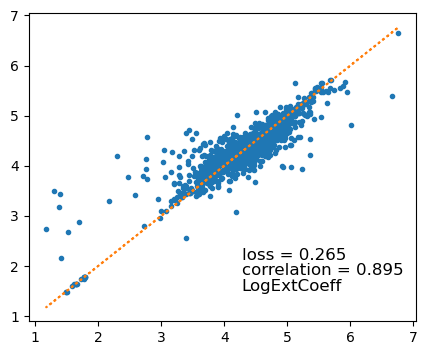

In [22]:
plot_rf_results(lec_y_test, lec_predicted, "LogExtCoeff")

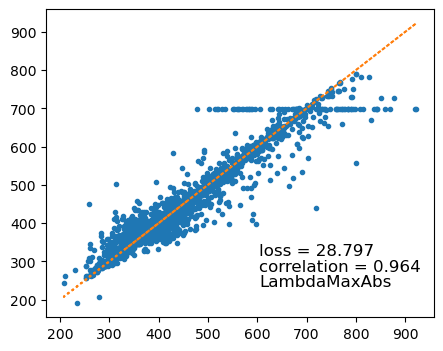

In [23]:
plot_rf_results(lma_y_test, lma_predicted, "LambdaMaxAbs")

## Add list of base molecules to explore and smarts of interest

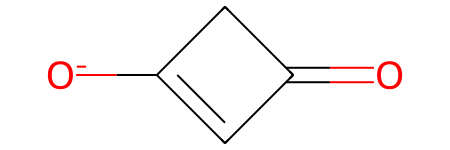

In [108]:
fluorene_smarts = "[#6]1-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-1"
squaraine_smarts = "[#6]1=[#6](-[#8-])-[#6]-[#6]-1=[#8]"
fluorene = rdkit.Chem.MolFromSmarts(fluorene_smarts)
squaraine = rdkit.Chem.MolFromSmarts(squaraine_smarts)
squaraine


## Here we are going to reference the loc (index) number on the scrambled dataframe optdata. Use "base_mol_chooser.ipynb" to select your index numbers.

In [113]:
def mol_from_index(index, df):
    """
    Return mol from index number
    """
    # find Tag value for user entered index number and draw the molecule
    tag_value = df.Tag[index]
    print(f"Index number {index} has Tag value: {tag_value}")
    mol_from_index = rdkit.Chem.MolFromSmiles(df.Chromophore[index])
    return mol_from_index, tag_value




In [112]:
molecule_ids = [23, 6652, 180, 10906, 39, 7004, 11234, 84]

In [118]:
# Create an empty DataFrame
bases_df = pd.DataFrame(columns=['Name','og_index', 'Tag', 'MolObject'])

# List to store the new rows
rows = []

# Loop through the molecule_ids and store the Mol objects in the list
for mol_id in molecule_ids:
    object_name = f"LogExtCoeff_{mol_id}"
    mol_object, tag_value = mol_from_index(mol_id, optdata_LogExtCoeff)
    rows.append({'Name': object_name, 'og_index': mol_id, 'Tag': tag_value, 'MolObject': mol_object})

# Concatenate all the rows at once to create the DataFrame
bases_df = pd.DataFrame(rows)



Index number 23 has Tag value: 3619
Index number 6652 has Tag value: 12208
Index number 180 has Tag value: 12177
Index number 10906 has Tag value: 12185
Index number 39 has Tag value: 15641
Index number 7004 has Tag value: 15359
Index number 11234 has Tag value: 4086
Index number 84 has Tag value: 12729


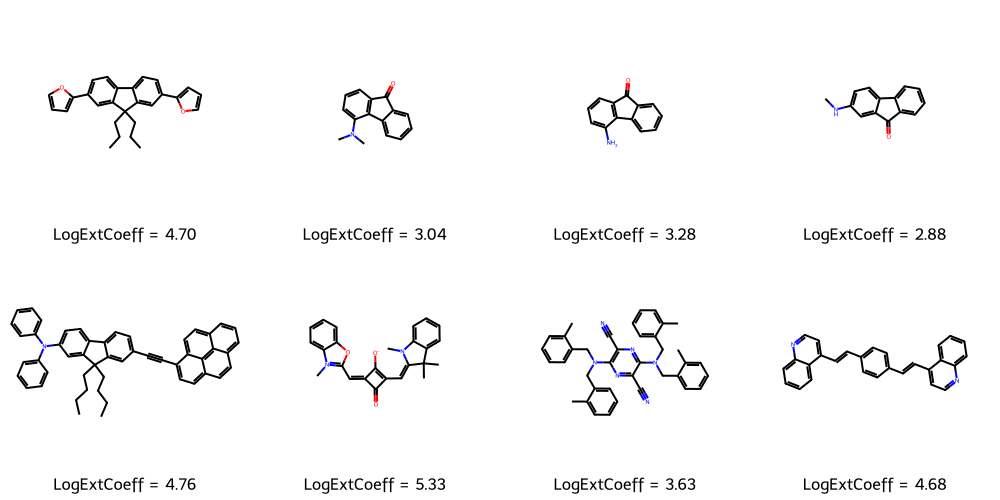

In [119]:
molstoplot = bases_df['MolObject'].tolist()
# Create legends for each molecule
legends = [f"LogExtCoeff = {optdata_LogExtCoeff.LogExtCoeff[id]:.2f}" for id in molecule_ids]
image = rdkit.Chem.Draw.MolsToGridImage(molstoplot, molsPerRow=4, subImgSize=(250, 250), legends=legends, useSVG=False)
# Save the image to a file
# image.save("molecules.png")
# Display the image inline in the Jupyter notebook
image

## Use exmol to generate the "space", and features for both models, or load from file

In [121]:
# Note that we are currently using a substructure preserver, as a default setting in exmol?

stoned_kwargs_5_5000 = {
    "num_samples": 5000,
    "alphabet": exmol.get_basic_alphabet(),
    "max_mutations": 5,
    # "preset": "synspace",
}

In [122]:
# Note that we are currently using a substructure preserver, as a default setting in exmol?

stoned_kwargs_2_2000 = {
    "num_samples": 2000,
    "alphabet": exmol.get_basic_alphabet(),
    "max_mutations": 2,
    # "preset": "synspace",
}

In [106]:
print (type(LogExtCoeff_10906))

<class 'rdkit.Chem.rdchem.Mol'>
